In [529]:
from qiskit.visualization import array_to_latex
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [530]:
def read(ar):
    new = []
    for i in range(M):
        new.append(ar[i]+ar[i+M])
    return new

In [531]:
def timestep(ar):
    new = np.zeros(2*M)
    #link 1
    for i in range(M-2,-1,-1):
        new[i+1] = ar[i]
        
    new[0] = ar[M-1]
    #link 2
    for i in range(M+2,2*M-1):
        new[i-1] = ar[i]
        
    new[2*M-1] = ar[M+1]
    #boundaries
    return new

In [532]:
def splitState(ar):
    new = [0 for i in range(2*M)]
    for i in range(M):
        new[i]=ar[i]*x
        new[i+M] = ar[i]*y
    return new

In [533]:
def evolve(t, ar):
    for i in range(t):
        ar = splitState(read(timestep(ar)))
    return ar

In [534]:
#parameters

M = 100 # lattices

w1 = 0.5 ##diffusion
w2 = 0.5 ##diffusion
e1 = 1   ##right
e2 = -1  ##left
cs = 1   ##speed of sound
u = 0.2  ##advection 


x = w1*(1+e1*u/cs**2)
y = w2*(1+e2*u/cs**2)
print(x,y)

0.6 0.4


In [535]:
classicalState = [0.005 for i in range(M)]
for i in range(5):
    classicalState[30+i] = 0.105
    
classicalState = splitState(classicalState)

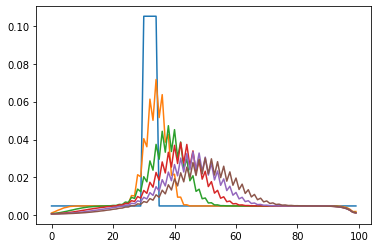

In [536]:
plt.plot([i for i in range(0,M)], read(classicalState));  

classicalState = evolve(10, classicalState)
plt.plot([i for i in range(0,M)], read(classicalState)); 

classicalState = evolve(20, classicalState)
plt.plot([i for i in range(0,M)], read(classicalState));

classicalState = evolve(20, classicalState)
plt.plot([i for i in range(0,M)], read(classicalState));

classicalState = evolve(20, classicalState)
plt.plot([i for i in range(0,M)], read(classicalState));

classicalState = evolve(20, classicalState)
plt.plot([i for i in range(0,M)], read(classicalState));